SML-17 Workshop #2: 2a The k nearest neighbour algorithm (kNN)

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


#### Training data

Let's prepare the data which contains two classes, each is drawn from gaussians about two centres, as follows:

In [2]:
x = 0.4 * np.random.randn(40, 2) # gaussian points 40 x 2
x[0:10] += np.array([1, 0]) 
x[10:20] += np.array([0, 1]) 
x[20:30] += np.array([0, 0]) 
x[30:40] += np.array([1, 1]) 
t = np.hstack([-np.ones(20), np.ones(20)]) # target vector 1 x 40

(40, 2) 0.440288825801 0.324341054575 -0.60063925167 1.51049813783
(40,) 0.0 1.0 -1.0 1.0


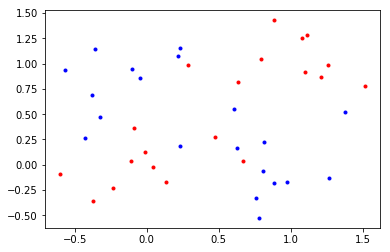

In [3]:
plt.plot(x[t==-1,0], x[t==-1,1], 'b.')
plt.plot(x[t==1,0], x[t==1,1], 'r.')
print(x.shape, np.mean(x), np.var(x), np.min(x), np.max(x))
print(t.shape, np.mean(t), np.var(t), np.min(t), np.max(t))

#### K Nearest Neighbours

An important classifier is the *k-nearest neighbour* classifier, which is probably the simplest approach both conceptually and in terms of implementation. It works by considered for each test point nearby points in the training set, and returns their majority label. The value of *k* selects how many neighbours to consider. Another important setting choice of the distance metric, used to measure how close each point is to other points.

Let's start by defining a function *euclidean* to calculate the euclidean distance, $d(\mathbf{x}, \mathbf{z}) = \sqrt{(\mathbf{x} - \mathbf{z})^T (\mathbf{x} - \mathbf{z})}$.

In [4]:
def euclidean(x, z):
    d = x - z
    if len(d.shape) > 1 and d.shape[1] > 1:
        return np.sqrt(np.diag(np.dot(d, d.T)))
    else:
        return np.sqrt(np.dot(d, d))

In the next five cells, we will trace the output of the euclidean distance with slight introduction about dealing with vectors using numpy module. Note: skip the n ext five cells if you are familiar with Python syntax.

In [5]:
euclidean(np.array([0,0]), np.array([1,1]))

1.4142135623730951

In [6]:
tmp = euclidean(np.array([[0,0],[1,0], [0.5,0.5]]), np.array([1,1]))
print(tmp)

[ 1.41421356  1.          0.70710678]


In [7]:
np.sort(tmp) # sorted vector 

array([ 0.70710678,  1.        ,  1.41421356])

In [8]:
np.argsort(tmp) # indices of sorted vector

array([2, 1, 0], dtype=int64)

In [9]:
np.argsort(tmp)[:2]

array([2, 1], dtype=int64)

Next, define a function to find nearby training points for a given test point under the euclidean distance.

In [10]:
def neighbours(x, train_x, k):
    # IMPLEMENT ME to return the indices of the k closest elements to x in train_x

Now define the *k-NN* prediction algorithm, which processes each test point and finds the majority class of its neighbours in the training set.

In [12]:
def knn(test_x, train_x, train_t, k):
    predict = np.zeros(test_x.shape[0]) # num of testing samples (i.e. # of rows)
    for i in range(test_x.shape[0]):  
        # IMPLEMENT ME to return class label of each sample in test_x using train_x
    return predict

In [13]:
knn(x, x, t, 3)

array([ 1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.])

Evaluate the predictions on the training set (this is now a **really** bad idea, can you explain why?) and the test set. How does the choice of *k* affect the accuracy?

Finally, plot the decision boundaries. How does the choice of k affect the boundary?

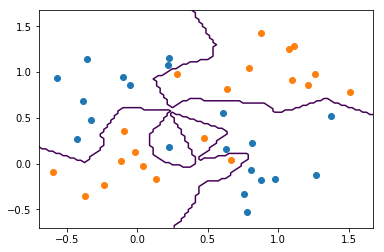

In [14]:
X1, X2 = np.meshgrid(np.arange(-0.7, 1.7, 0.025), np.arange(-0.7, 1.7, 0.025))
X12 = np.column_stack([X1.flatten(), X2.flatten()])
Y = knn(X12, x, t, 1)
cs = plt.contour(X1, X2, Y.reshape(X1.shape), levels=[0]) 
plt.plot(x[t==-1,0], x[t==-1,1], 'o')
plt.plot(x[t==1,0], x[t==1,1], 'o')